In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'E:\final year project\justifi-legal-ai\datasets\binary_single_train\CJPE_ext_SCI_HCs_Tribunals_daily_orders_single.csv')

In [3]:
df.sample(5)

,filename,text,label
286160,Delhi_District_Court_2007_2020_2008_3889,The present criminal revision is by the accuse...,0
296864,SupremeCourt_2004_622,"Thakker, J.The present appeal is filed by the ...",1
42202,Uttarakhand_HC_2018_3035,"Coram Honble Rajiv Sharma, Honble Manoj Kumar ...",1
169281,karnataka_HC_2013_4475,Defendant in original suit bearing No.on the f...,1
28847,Orissa_HC_1975_140,"N. Misra, J.This is an appeal under Section 26...",1


In [4]:
df.shape

(301059, 3)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301059 entries, 0 to 301058
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   filename  301059 non-null  object
 1   text      301059 non-null  object
 2   label     301059 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [7]:
# missing values
df.isnull().sum()

filename    0
text        0
label       0
dtype: int64

In [8]:
# check for duplicate values
df.duplicated().sum()

np.int64(0)

## 2.EDA

In [9]:
df.head()

,filename,text,label
0,Calcutta_High_Court_Appellete_Side_2008_2020_2...,"Judgment on 18th April, 2008.Bhaskar J.These t...",0
1,Bombay_HC_BomHC_1937_179,"Beaumont, C.J.This is an appeal from a decisio...",0
2,karnataka_HC_1998_425,The appellant has filed this appeal assailing ...,0
3,Bombay_HC_BomHC_1994_60,"The petitioner, Forbes Forbes Campbel and.Comp...",1
4,Madras_HC_2017_4649,The writ petitioner was allotted plot No.60 fo...,1


In [10]:
df['label'].value_counts()

label
0    152667
1    148392
Name: count, dtype: int64

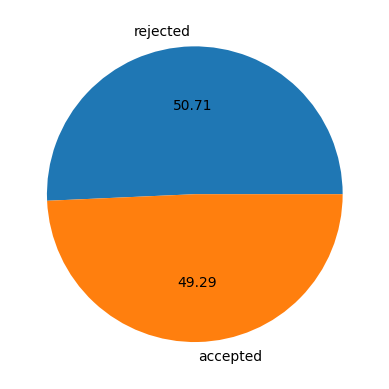

In [11]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['rejected','accepted'],autopct="%0.2f")
plt.show()

In [12]:
# Data is balanced

In [13]:
import nltk

In [14]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
df['num_characters'] = df['text'].apply(len)

In [16]:
df.head()

,filename,text,label,num_characters
0,Calcutta_High_Court_Appellete_Side_2008_2020_2...,"Judgment on 18th April, 2008.Bhaskar J.These t...",0,8038
1,Bombay_HC_BomHC_1937_179,"Beaumont, C.J.This is an appeal from a decisio...",0,34012
2,karnataka_HC_1998_425,The appellant has filed this appeal assailing ...,0,12431
3,Bombay_HC_BomHC_1994_60,"The petitioner, Forbes Forbes Campbel and.Comp...",1,24862
4,Madras_HC_2017_4649,The writ petitioner was allotted plot No.60 fo...,1,12541


In [17]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df.head()

,filename,text,label,num_characters,num_words
0,Calcutta_High_Court_Appellete_Side_2008_2020_2...,"Judgment on 18th April, 2008.Bhaskar J.These t...",0,8038,1460
1,Bombay_HC_BomHC_1937_179,"Beaumont, C.J.This is an appeal from a decisio...",0,34012,6793
2,karnataka_HC_1998_425,The appellant has filed this appeal assailing ...,0,12431,2378
3,Bombay_HC_BomHC_1994_60,"The petitioner, Forbes Forbes Campbel and.Comp...",1,24862,4576
4,Madras_HC_2017_4649,The writ petitioner was allotted plot No.60 fo...,1,12541,2197


In [19]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,filename,text,label,num_characters,num_words,num_sentences
0,Calcutta_High_Court_Appellete_Side_2008_2020_2...,"Judgment on 18th April, 2008.Bhaskar J.These t...",0,8038,1460,1
1,Bombay_HC_BomHC_1937_179,"Beaumont, C.J.This is an appeal from a decisio...",0,34012,6793,16
2,karnataka_HC_1998_425,The appellant has filed this appeal assailing ...,0,12431,2378,11
3,Bombay_HC_BomHC_1994_60,"The petitioner, Forbes Forbes Campbel and.Comp...",1,24862,4576,2
4,Madras_HC_2017_4649,The writ petitioner was allotted plot No.60 fo...,1,12541,2197,2


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,301059.000000,301059.000000,301059.000000
mean,11455.831478,2108.938281,3.602895
std,13563.663030,2509.707286,6.137976
min,235.000000,52.000000,1.000000
25%,3233.000000,587.000000,1.000000
50%,7489.000000,1371.000000,2.000000
75%,14459.000000,2666.000000,4.000000
max,184647.000000,34200.000000,1053.000000


In [22]:
# ham
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,152667.000000,152667.000000,152667.000000
mean,11522.504726,2123.837430,3.664610
std,13711.279431,2540.798326,6.523043
min,235.000000,52.000000,1.000000
25%,3176.500000,579.000000,1.000000
50%,7487.000000,1373.000000,2.000000
75%,14582.000000,2689.000000,4.000000
max,183335.000000,34200.000000,1053.000000


In [23]:
#spam
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,148392.000000,148392.000000,148392.000000
mean,11387.237452,2093.609905,3.539402
std,13409.798486,2477.228400,5.714127
min,260.000000,52.000000,1.000000
25%,3289.000000,596.000000,1.000000
50%,7491.000000,1368.500000,2.000000
75%,14352.000000,2645.000000,4.000000
max,184647.000000,33321.000000,364.000000


In [24]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

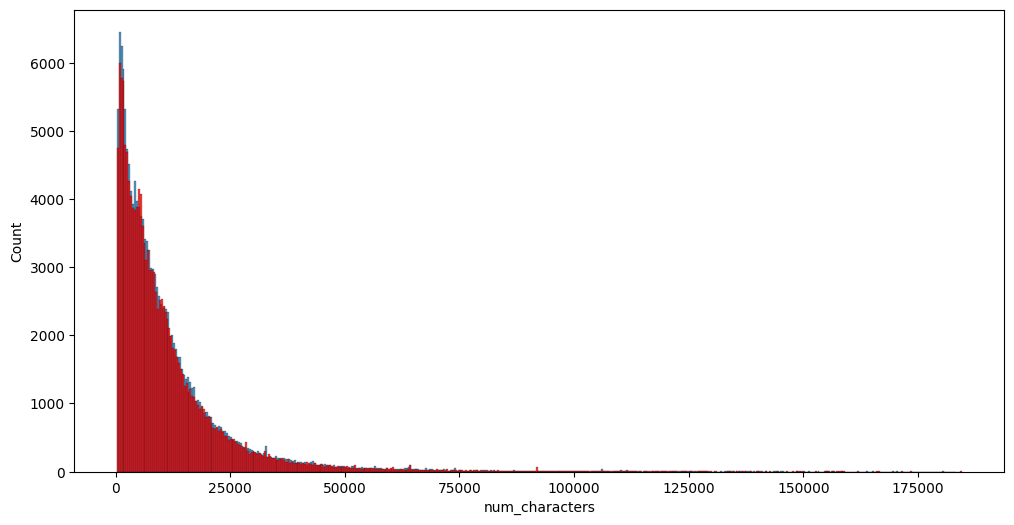

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

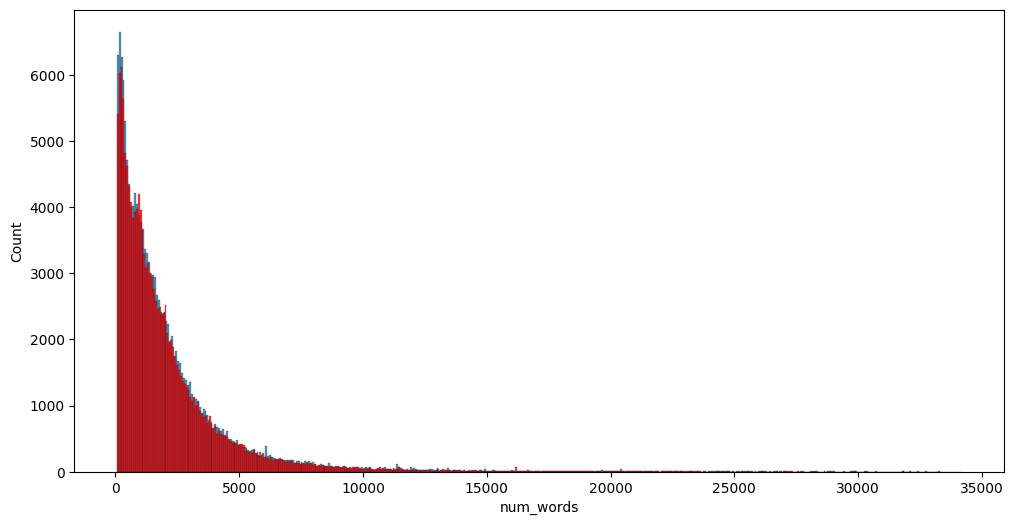

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

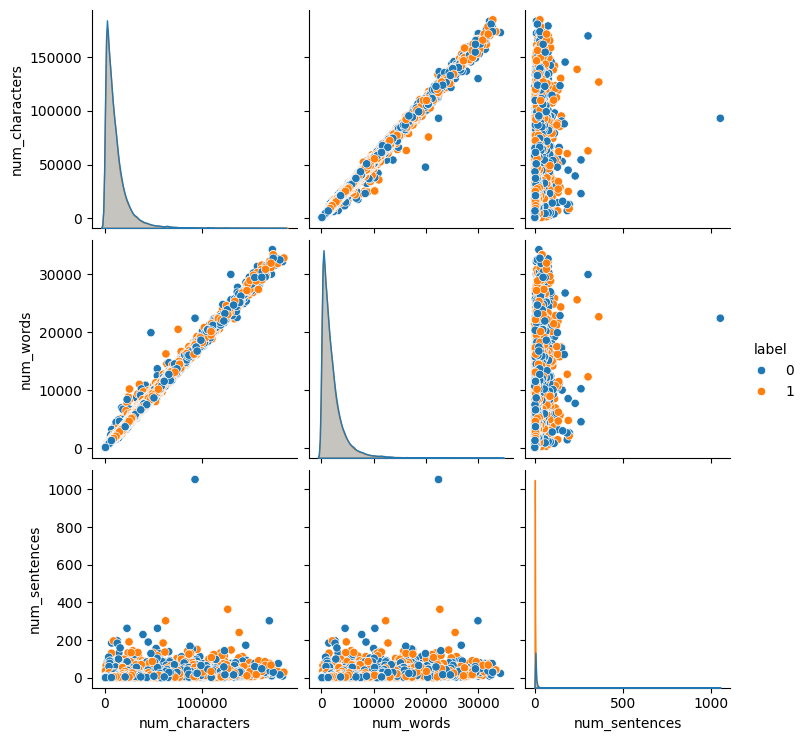

In [27]:
sns.pairplot(df,hue='label')

<Axes: >

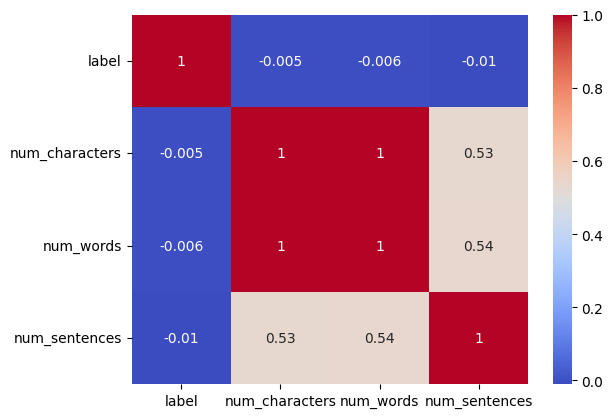

In [28]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [29]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

STOP_WORDS = ENGLISH_STOP_WORDS

def transform_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)   # remove numbers & punctuation
    return " ".join(
        word for word in text.split()
        if word not in STOP_WORDS and len(word) > 2
    )


In [31]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gonna home soon don want talk stuff anymore tonight cried today'

In [32]:
df['text'][10]

'Date ORAL JUDGMENT The petitioner State Government through the Page 1 of 10 HC-NIC Page 1 of 10 Created On Sat Aug 12 123530 IST 2017 C SCA/14275/2003 JUDGMENT Commissioner of Education, Education Department, by way of present petition filed under Articles 226 and 227 of the of India, has prayed for quashing and setting aside the impugned judgment and order dated passed by the Gujarat Civil Services Tribunal, in Appeal No.414 of 1998.Brief facts giving rise to the present petition are as under 2.1 The respondent was working with the petitioner- Department in one cadre with the same pay scale since last 38 years.The respondent had retired from services on at the age of 2.2 The Government of Gujarat vide its Resolution being No.PGR/1194-45-M, dated 16.08.1994 to extend the benefit of Higher Grade Pay Scale to the Government working in different cadres, wherein, the cut-off date prescribed for getting benefit of Higher Grade Pay Scale is 2.3 The respondent, after his made a before the pe

In [33]:

ps.stem('loving')

'love'

In [34]:
# df['transformed_text'] = df['text'].apply(transform_text)
df['transformed_text'] = df['text'].map(transform_text)


In [35]:
df.head()

,filename,text,label,num_characters,num_words,num_sentences,transformed_text
0,Calcutta_High_Court_Appellete_Side_2008_2020_2...,"Judgment on 18th April, 2008.Bhaskar J.These t...",0,8038,1460,1,judgment april bhaskar appeals arise cases sec...
1,Bombay_HC_BomHC_1937_179,"Beaumont, C.J.This is an appeal from a decisio...",0,34012,6793,16,beaumont appeal decision sitting bankruptcy fa...
2,karnataka_HC_1998_425,The appellant has filed this appeal assailing ...,0,12431,2378,11,appellant filed appeal assailing order learned...
3,Bombay_HC_BomHC_1994_60,"The petitioner, Forbes Forbes Campbel and.Comp...",1,24862,4576,2,petitioner forbes forbes campbel company limit...
4,Madras_HC_2017_4649,The writ petitioner was allotted plot No.60 fo...,1,12541,2197,2,writ petitioner allotted plot extent executing...


In [36]:
df.drop(columns=['text'], inplace=True)

In [37]:
df.to_csv("binary_train_processed.csv", index=False, encoding="utf-8")


In [38]:
df_test= pd.read_csv(r'E:\final year project\justifi-legal-ai\datasets\binary_test\CJPE_ext_SCI_HCs_Tribunals_daily_orders_test.csv')

In [39]:
df_test['num_characters'] = df_test['text'].apply(len)

In [40]:
df_test['num_words'] = df_test['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [41]:
df_test['num_sentences'] = df_test['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [43]:
df_test['transformed_text'] = df_test['text'].map(transform_text)

In [44]:
df_test.drop(columns=['text'], inplace=True)

In [45]:
df_test.to_csv("binary_test_processed.csv", index=False, encoding="utf-8")
